In [1]:
import os

import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import snkit

plt.style.use("bmh")

In [18]:
root_dir = ".."
save_dir = os.path.join(root_dir, "results/multi-modal_network/project-thailand")
nodes = gpd.read_parquet(os.path.join(save_dir, "nodes.gpq"))
edges = gpd.read_parquet(os.path.join(save_dir, "edges.gpq"))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.geometry = world.geometry.boundary

/tmp/ipykernel_1191825/446239100.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


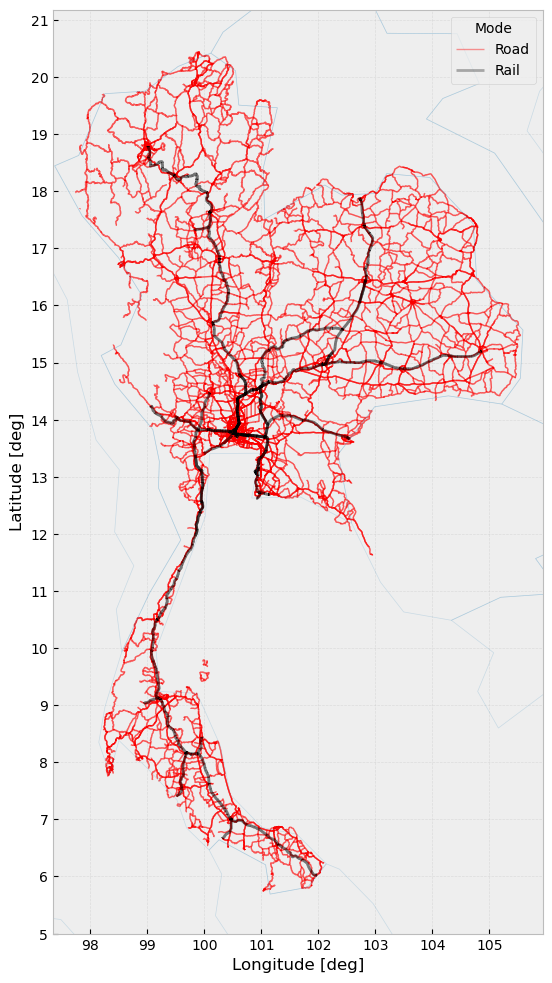

In [25]:
f, ax = plt.subplots(figsize=(8, 12))
road = edges[edges["mode"]=="road"]
rail = edges[edges["mode"]=="rail"]
road.plot(ax=ax, ls="-", color="r", alpha=0.4, lw=1, label="Road")
rail.plot(ax=ax, ls="-", color="k", alpha=0.3, lw=2, label="Rail")
ax.set_yticks(range(5, 22))
ax.set_xticks(range(98, 106))
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
world.plot(ax=ax, lw=0.5, alpha=0.2)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(alpha=0.3)
ax.legend(title="Mode")
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")
f.savefig("land_network.png")